# Digital Downconversion

To obtain a single side band time-series of a real signal, the Hilbert transform can be used. It works as follows. First, the signal is converted into frequency domain representation using discrete Fourier transform. Then, the second half of the spectrum (&pi; to 2&pi;) is set to zero, which essentially remove the double-sided nature of real signal. Finally, the time-domain representation is obtained by performing the inverse Fourier transform.

In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import blib

In [2]:
def hilbert(x):
    nfft = int(np.power(2, np.ceil(np.log2(len(x)))))
    xf = np.fft.fft(x, nfft)
    H = int(nfft / 2)
    # Numpy's FFT module has a default normalization of 1 / N already
    xf[1:H] *= 2.0
    xf[H:nfft] = 0
    y = np.fft.ifft(xf, nfft)
    return y[0:len(x)]

In [3]:
def downConvert(x, omega):
    s = np.exp(-1j * omega * np.pi * np.arange(len(x)))
    return hilbert(x) * s

In [4]:
n = np.arange(400)
x = np.sin(0.02 * 2.0 * np.pi * n + 0.1)
x[-200::] = 0
np.sqrt(np.sum(np.abs(x) ** 2))

10.0

In [5]:
xc = hilbert(x)
np.sqrt(np.sum(np.abs(xc[0:200]) ** 2))

14.058436877300084

In [9]:
xc2 = hilbert(xc)
np.sqrt(np.sum(np.abs(xc2[0:200]) ** 2))

28.04104007824746

In [7]:
d = downConvert(x, 0.015)
np.sqrt(np.sum(np.abs(d) ** 2))

14.098580210241847

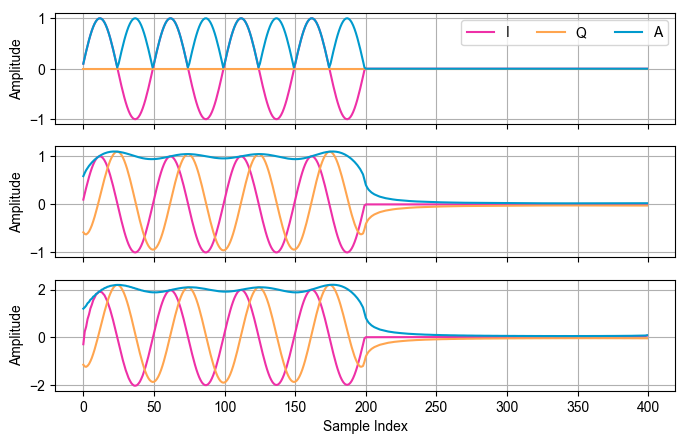

In [14]:
fig = matplotlib.pyplot.figure(figsize=(8, 5), dpi=100)

ax = matplotlib.pyplot.subplot(311)
matplotlib.pyplot.plot(n, x.real, label='I')
matplotlib.pyplot.plot(n, x.imag, label='Q')
matplotlib.pyplot.plot(n, np.abs(x), label='A')
matplotlib.pyplot.grid()
matplotlib.pyplot.legend(ncol=3)
matplotlib.pyplot.ylabel('Amplitude')
ax.tick_params(labelbottom=False)

ax = matplotlib.pyplot.subplot(312)
matplotlib.pyplot.plot(n, xc.real)
matplotlib.pyplot.plot(n, xc.imag)
matplotlib.pyplot.plot(n, np.abs(xc))
matplotlib.pyplot.grid()
matplotlib.pyplot.ylabel('Amplitude')
ax.tick_params(labelbottom=False)

matplotlib.pyplot.subplot(313)
matplotlib.pyplot.plot(n, xc2.real)
matplotlib.pyplot.plot(n, xc2.imag)
matplotlib.pyplot.plot(n, np.abs(xc2))

# matplotlib.pyplot.plot(n, d.real, label='I')
# matplotlib.pyplot.plot(n, d.imag, label='Q')
# matplotlib.pyplot.plot(n, np.sqrt(np.abs(d)), label='A')
matplotlib.pyplot.grid()
matplotlib.pyplot.xlabel('Sample Index')
matplotlib.pyplot.ylabel('Amplitude')
